<a href="https://colab.research.google.com/github/puneet-08/projects/blob/main/Expectation_Maximization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Expectation Maximization

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

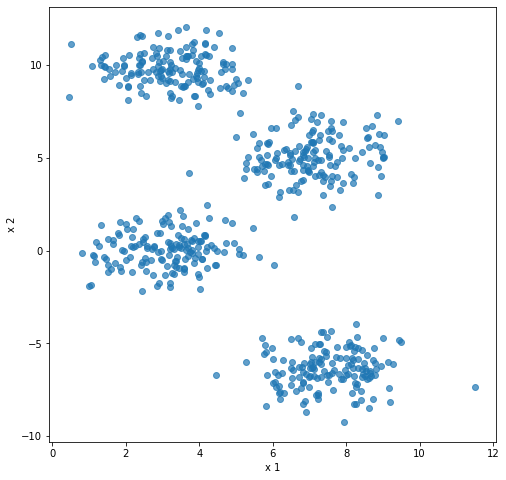

In [2]:
# Creating and visualizing dataset

x_train, _ = make_blobs(n_samples= 600, centers= 4, n_features= 2, random_state=18)
fig, ax = plt.subplots(figsize = (8,8))
plt.scatter(x_train[:,0], x_train[:,1], marker = 'o', alpha = 0.7)
plt.xlabel('x 1')
plt.ylabel('x 2')
plt.show()

Steps to follow - 

1. Guess number of clusters/groups 'z'.
2. Assumption is that all of the 'z' clusters are multivariate normal distributed with - mu(mean) and sigma(covariance). Each of the datapoint in our training set are taken from a mixture of these 'z' gaussian distributions; distributed with phi (multinomial probability).  In this step we initialize phi, mu, sigma for each of the clusters.
3. Expectation Step - 
>* For each of the point in the dataset calculate 'weights'(how much we want to assign a datapoint to each of the gaussians) for  the particular point to be taken from each of the 'z' multivariate distributions.
>* Assign the data point to the group for which it has maximum weight.
4. Maximization Step- using the weights calculated in step 3, recalculate phi, mu and sigma such that we maximize 'weights' for each datapoints of the groups. 
5. Repeat step 3 and step 4 until convergence. Aim is that for each data point, we need to put maximum weight on one of the gaussians amongst the 'z' clusters. 

In [3]:
# Step 1
z = 4 #guess (number of clusters)

In [4]:
# Step 2

def init_params(X,z):
  np.random.shuffle(X)
  num_samples = int(len(X)/z)
  mu = []
  phi = []
  sigma = []
  for i in range(z):
    x = X[i*num_samples : (i+1)*num_samples]
    mu.append(np.mean(x,axis =0))
    sigma.append(np.cov(x, rowvar=False))
    phi.append(len(x)/len(X))

  return np.array(phi), np.array(mu), np.array(sigma)

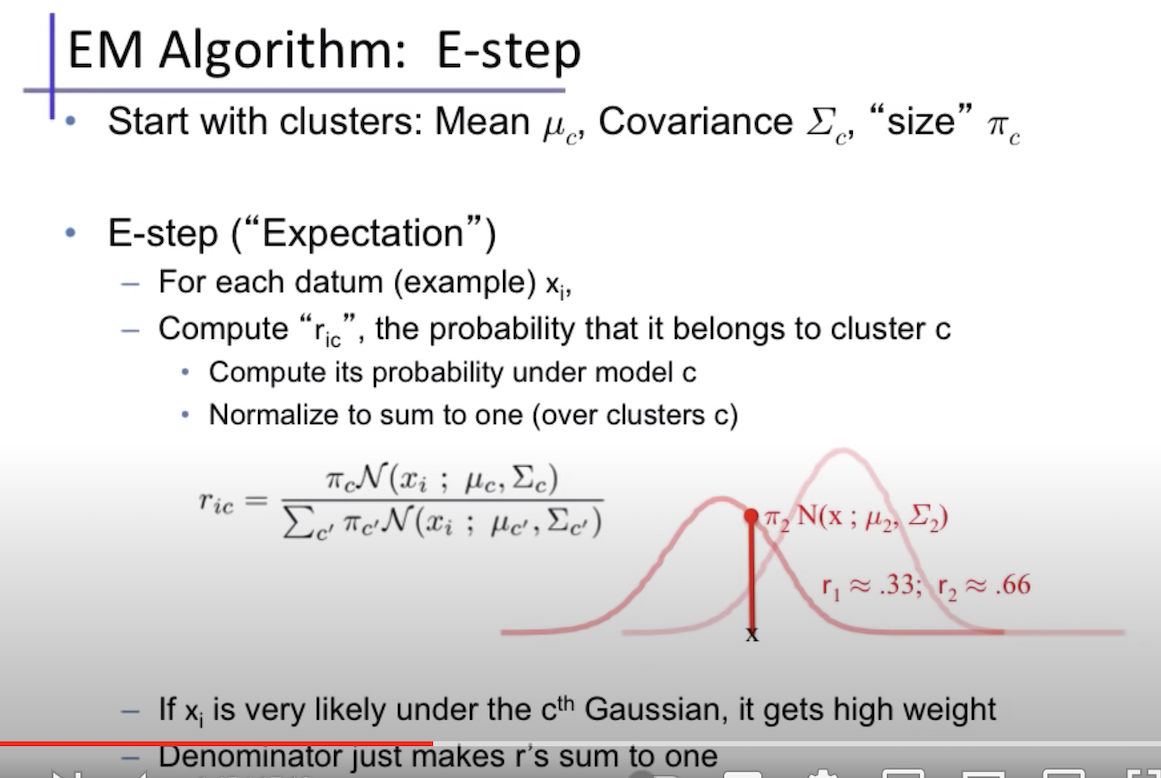

In [5]:
# Step 3 

def expectation(X,phi, mu, sigma, z):

  weights = [] #ric in the image is equivalent to weights in the code; phi is equivalent to pi
  clusters = []

  for i in range(len(X)):
    weight = []
    for j in range(z):
      weight.append(multivariate_normal.pdf(X[i], mean = mu[j], cov=sigma[j])* phi[j])
    weight = np.array(weight)/np.sum(weight)
    weights.append(weight)
    clusters.append(np.argmax(weight))

  return np.array(weights), np.array(clusters)


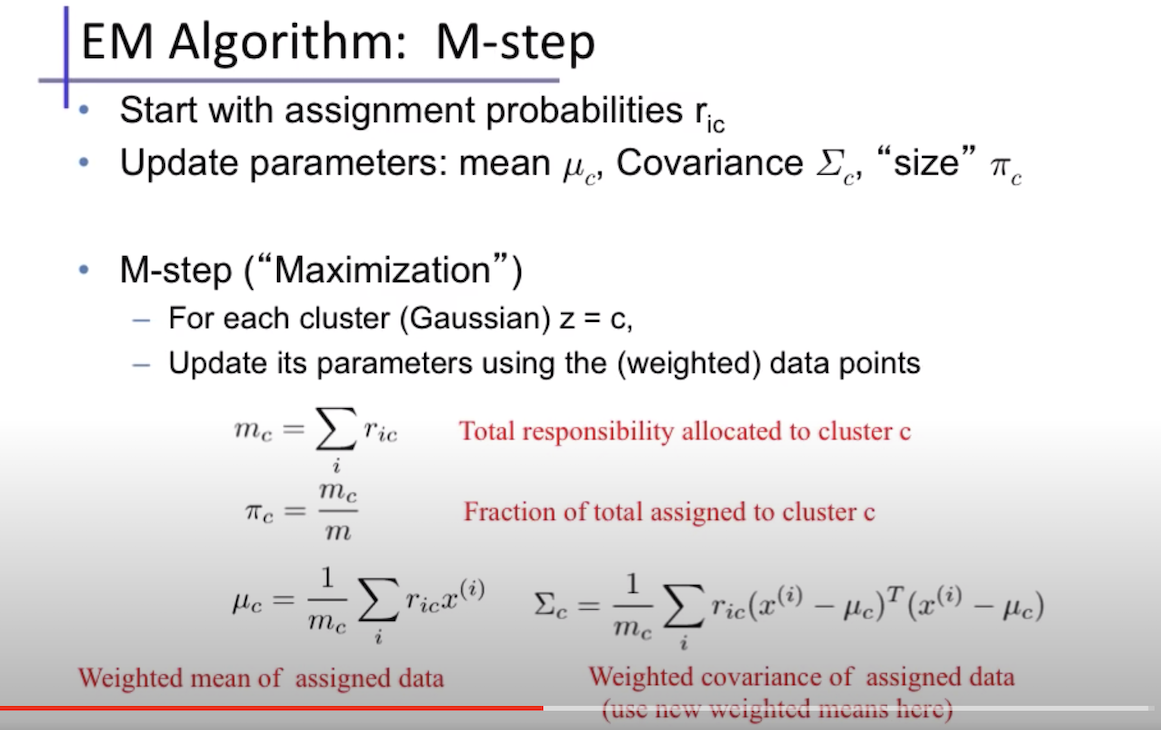

In [6]:
# Step 4

def maximization(X, weights, clusters, z):
  phi = np.sum(weights, axis =0)/len(weights)
  mu=[]
  sigma =[]
  for i in range(z):
    mu.append(np.sum(weights[:,i].reshape(-1,1) * x_train, axis = 0)/np.sum(weights[:,i]))
    sigma.append(np.matmul((weights[:,i].reshape(-1,1)*(x_train - mu[i])).T , (x_train- mu[i]))/np.sum(weights[:,i]))
  return phi, mu, sigma


In [7]:
# Step 5; Tying all the parts of the algorithm.

def expectation_maximization(X,z, num_iter):

  phi, mu, sigma = init_params(x_train,z)
  counter = 0
  
  while True:      
    weights, clusters = expectation(x_train, phi, mu, sigma,z)

    if counter % 10 ==0 : 
      print(f"value of phi after {counter} iterations is :  {phi}")
      print(f"probability distribution of first datapoint after {counter} iterations is :  {weights[0]}")
      print('\n')

    phi, mu, sigma = maximization(x_train, weights, clusters,z)
    
    if counter == num_iter:
      break
    counter +=1

  return phi, clusters, weights

In [8]:
# Trianing and Predicting

phi, clusters, weights = expectation_maximization(x_train, 4, 100)

value of phi after 0 iterations is :  [0.25 0.25 0.25 0.25]
probability distribution of first datapoint after 0 iterations is :  [0.19390924 0.22811209 0.28218878 0.29578989]


value of phi after 10 iterations is :  [0.254727   0.2438905  0.25747844 0.24390406]
probability distribution of first datapoint after 10 iterations is :  [0.17351283 0.24114232 0.31933155 0.2660133 ]


value of phi after 20 iterations is :  [0.25147716 0.21036053 0.32867973 0.20948257]
probability distribution of first datapoint after 20 iterations is :  [0.09083253 0.47013096 0.00222549 0.43681102]


value of phi after 30 iterations is :  [0.24983705 0.24744876 0.48818588 0.01452831]
probability distribution of first datapoint after 30 iterations is :  [2.28483104e-51 9.89922097e-01 7.13215125e-08 1.00778320e-02]


value of phi after 40 iterations is :  [0.25000002 0.24985086 0.40082255 0.09932658]
probability distribution of first datapoint after 40 iterations is :  [2.52658790e-51 9.99999982e-01 1.09007806e-

We can see how after 100 iterations, model was able to predict with 99% probability that the first datapoint belonged to the cluster 2.

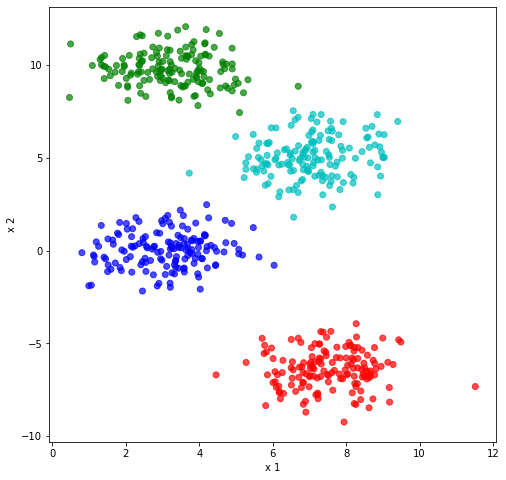

In [9]:
# Plotting dataset with each instance colored accoding to the assigned cluster

colormap = np.array(['r','g','b', 'c'])
fig, ax = plt.subplots(figsize = (8,8))
plt.scatter(x_train[:,0], x_train[:,1], marker = 'o', alpha = 0.7, c = colormap[clusters])
plt.xlabel('x 1')
plt.ylabel('x 2')
plt.show()

We were able to segregate each of the datapoint into an individual cluster.

### References

1. Lecture 14 and 15 of - https://www.youtube.com/watch?v=jGwO_UgTS7I&list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU
2. https://cs229.stanford.edu/notes2021fall/cs229-notes8.pdf
3. https://www.youtube.com/watch?v=qMTuMa86NzU